In [16]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import os
script_dir = os.path.split(os.getcwd())[0] + '/' + os.path.split(os.getcwd())[1]

-----------------------------------------------------------------------------------------
En sentence:  it's just down the hall . I'll bring you some now . if there is anything else you need , just let me know . 
Fr sentence:  c' est juste dans le hall . je vais vous en apporter maintenant . si vous n' avez rien à


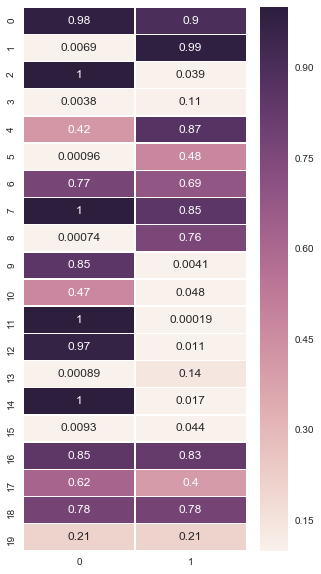

-----------------------------------------------------------------------------------------
En sentence:  no worry about that . I'll take it and you need not wrap it up .          
Fr sentence:  merci d' avoir le faire emballer , 


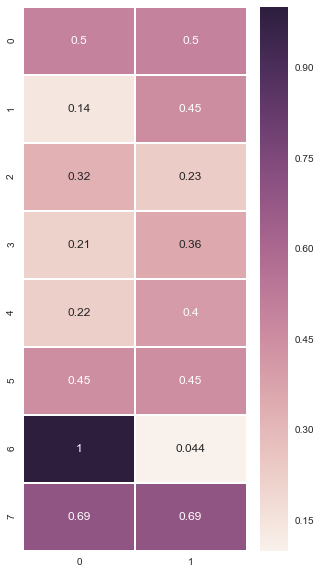

-----------------------------------------------------------------------------------------
En sentence:  do you do alterations ?                     
Fr sentence:  vous faites bien les lieux de vous le faire à un spectacle ? 


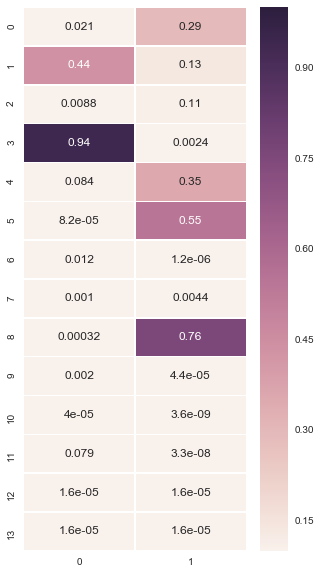

-----------------------------------------------------------------------------------------
En sentence:  the light was red .                     
Fr sentence:  rouge 


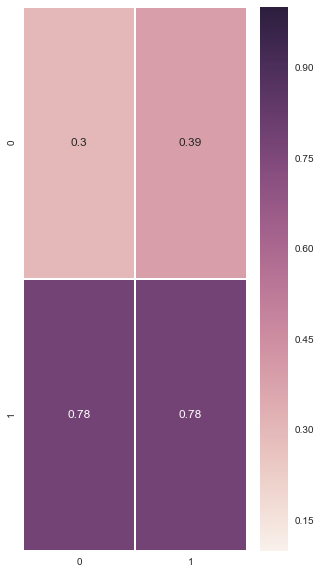

-----------------------------------------------------------------------------------------
En sentence:  we want to have a table near the window .                
Fr sentence:  près de celui près de la fenêtre . 


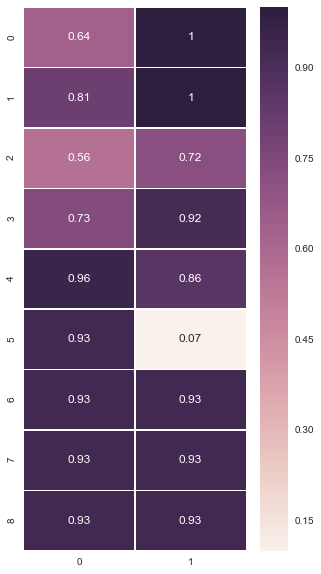

-----------------------------------------------------------------------------------------
En sentence:  it's over there , just in front of the tourist information .              
Fr sentence:  devant l' hôpital du Japon . 


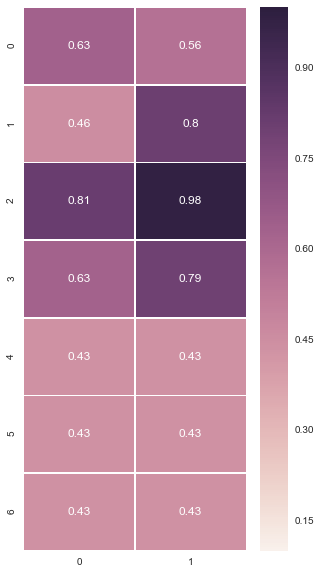

-----------------------------------------------------------------------------------------
En sentence:  I twisted it playing tennis . it felt Okay after the game but then it started turning black-and-blue . is it serious ?   
Fr sentence:  il m' en Amérique de jouer au tennis . je me demande pas après le match mais il n' y


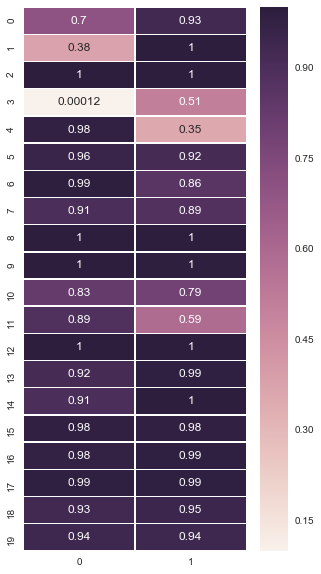

-----------------------------------------------------------------------------------------
En sentence:  please input your pin number .                    
Fr sentence:  sur votre numéro de téléphone . 


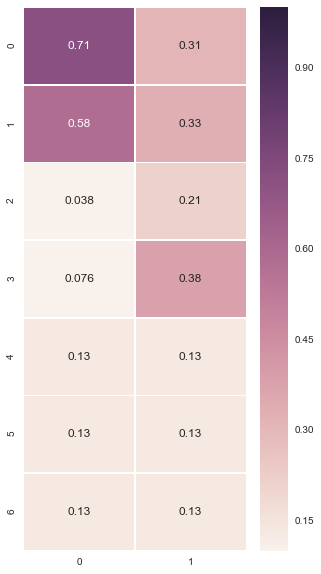

-----------------------------------------------------------------------------------------
En sentence:  this is my first time diving .                   
Fr sentence:  à la prochaine fois que je trouve la prochaine fois que je trouve la fois que c' est ma fois


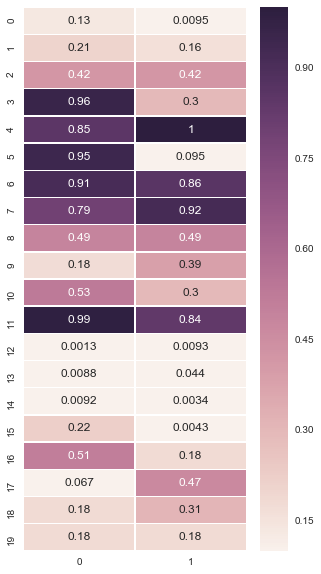

-----------------------------------------------------------------------------------------
En sentence:  I've never heard of this address around here .                 
Fr sentence:  


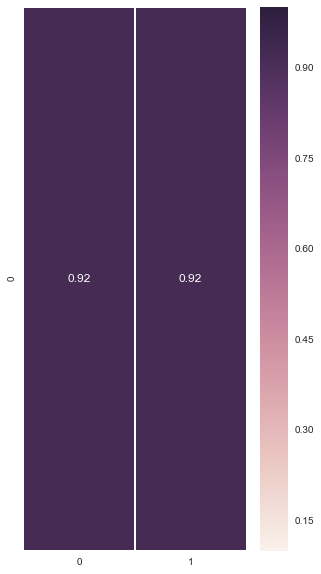

In [18]:
epoch = 1
batch = 1

mc = pickle.load( open( script_dir +"/data_MC/MC_file_"+ str(epoch) + "_"+ str(batch) + ".txt", "rb" ) )
for sent_idx in range(10):
    print('-----------------------------------------------------------------------------------------')
    print('En sentence: ', ' '.join(mc[sent_idx][0]))
    print('Fr sentence: ', ' '.join(mc[sent_idx][1]))
    reward = []
    roll_num = len(mc[0][2][0])
    for reward_idx in range(len(mc[sent_idx][2])-1):
        reward.append(mc[sent_idx][2][reward_idx])
    last_reward = mc[sent_idx][2][-1]
    reward.append([last_reward for i in range(roll_num) ])
    reward = np.array(reward)
    data = pd.DataFrame(data=reward)
    sns.set()
    f, ax = plt.subplots(figsize=(5, 10))
    sns.heatmap(data, annot=True, linewidths=.5, ax=ax, vmin=0.1, vmax=1.0)
    sns.plt.show()

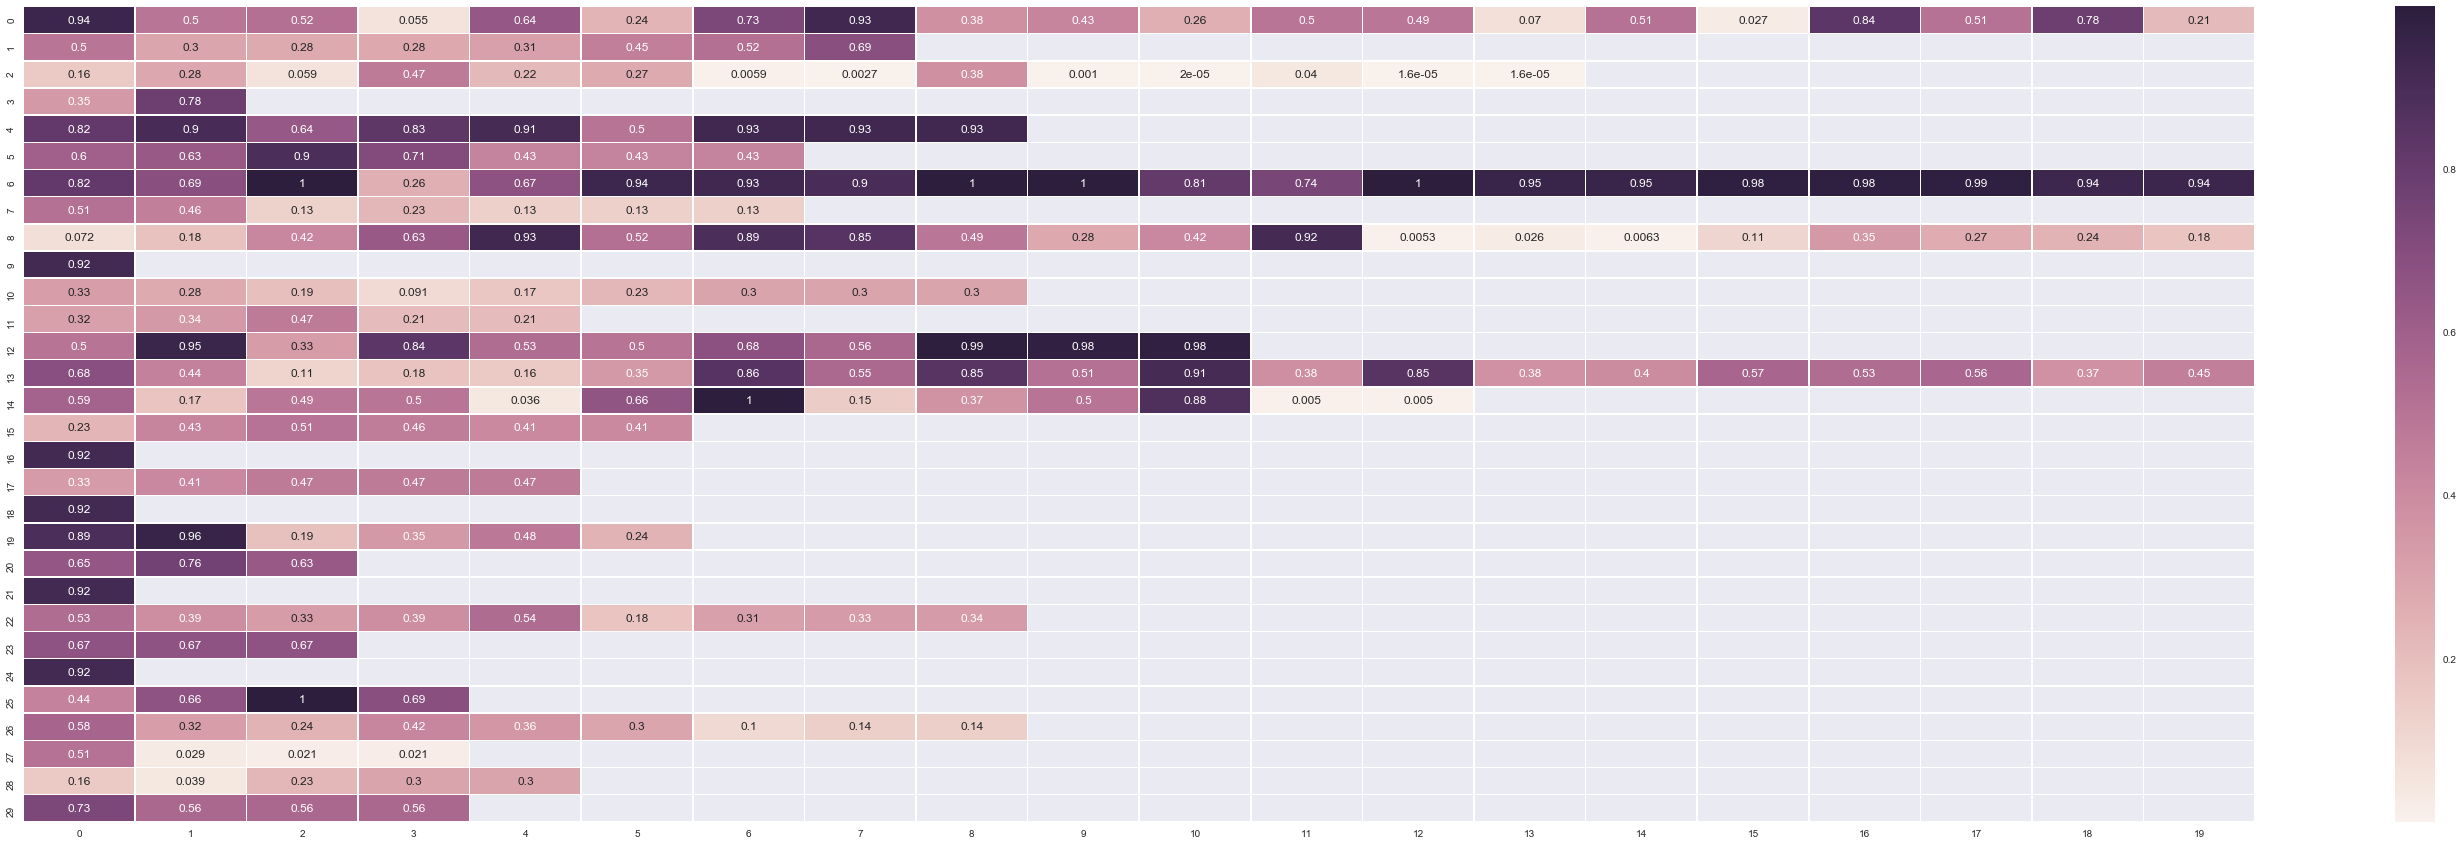

In [19]:
epoch = 1
batch = 1

mc = pickle.load( open( script_dir +"/data_MC/MC_file_"+ str(epoch) + "_"+ str(batch) + ".txt", "rb" ) )
for sent_idx in range(len(mc)):
    for reward_idx in range(len(mc[sent_idx][2])):
        mc[sent_idx][2][reward_idx] =  np.array(mc[sent_idx][2][reward_idx]).mean()
data = pd.DataFrame(data=mc, columns=['en', 'fr', 'reward'])
reward_data = pd.DataFrame([x for x in data.reward])
fr_data = pd.DataFrame([x for x in data.fr])

sns.set()
f, ax = plt.subplots(figsize=(50, 15))
sns.heatmap(reward_data, annot=True, linewidths=.5, ax=ax)

In [ ]:
#data.head()
#reward_data.head()
#fr_data.head()

In [21]:
sentence_index = 10
print('Source: ', mc[sentence_index][0])
print('Target: ', mc[sentence_index][1])
print('Reward: ', mc[sentence_index][2])

Source:  ['I', 'have', 'a', 'sore', 'pain', 'here', '.', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
Target:  ['ici', "j'", 'ai', 'mal', 'à', "l'", 'estomac', '.', '']
Reward:  [0.32584557 0.27735609 0.19155335 0.090629302 0.16562316 0.22928338
 0.30427256 0.30427256 0.30427256]


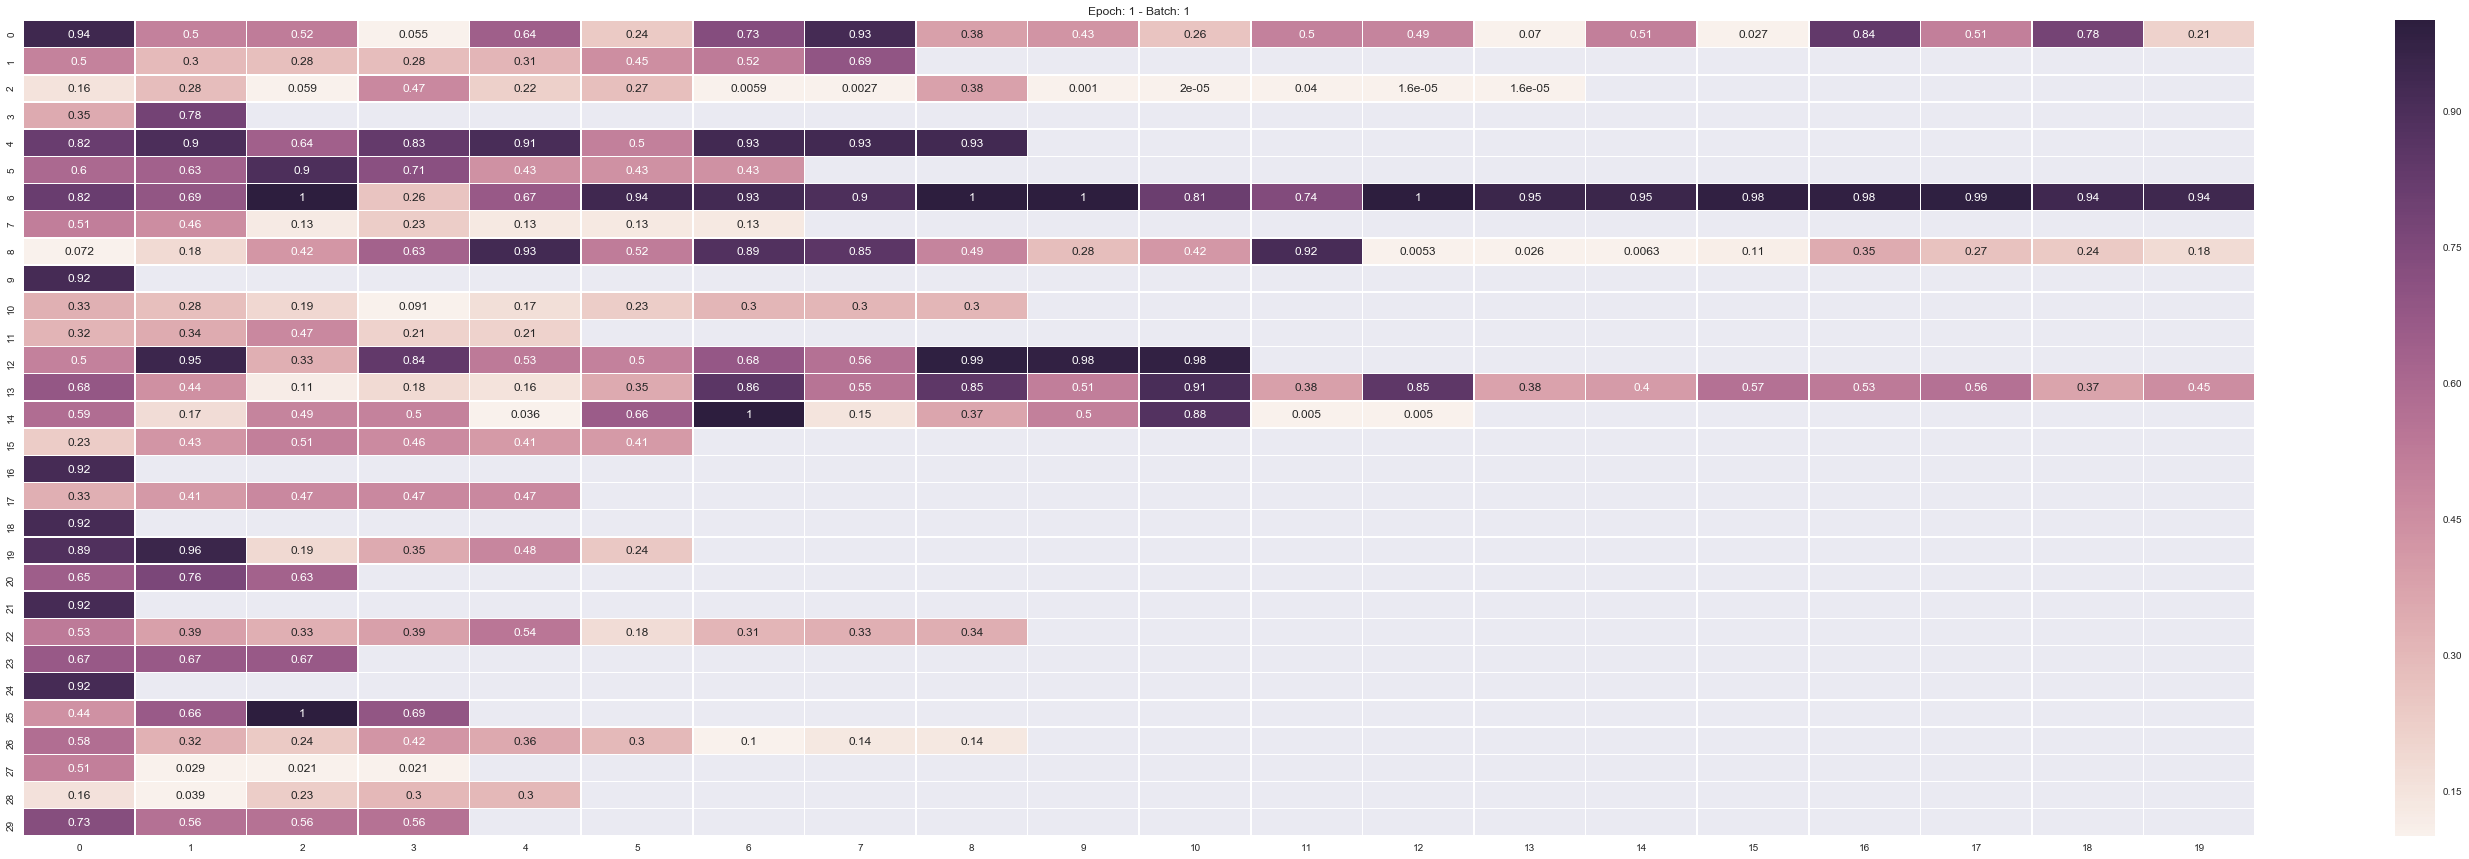

In [23]:
epoch_from = 1
epoch_to = 1
batch_from = 1
batch_to = 1
for epoch in range(epoch_from, epoch_to+1):
    for batch in range(batch_from, batch_to+1):
        mc = pickle.load( open( script_dir +"/data_MC/MC_file_"+ str(epoch) + "_"+ str(batch) + ".txt", "rb" ) )
        for sent_idx in range(len(mc)):
            for reward_idx in range(len(mc[sent_idx][2])) :
                mc[sent_idx][2][reward_idx] =  np.array(mc[sent_idx][2][reward_idx]).mean()
        data = pd.DataFrame(data=mc, columns=['en', 'fr', 'reward'])
        reward_data = pd.DataFrame([x for x in data.reward],  )
        fr_data = pd.DataFrame([x for x in data.fr])
        f, ax = plt.subplots(figsize=(50, 15))
        sns.set()
        sns.plt.title('Epoch: ' + str(epoch) + ' - Batch: ' + str(batch))
        sns.heatmap(reward_data, annot=True, linewidths=.5, ax=ax, vmin=0.1, vmax=1.0)

### 